# Predicción de Contratación de Fondos de Inversión

## Definiciones Importantes
Los **Fondos de Inversión** son una fuente alternativa de ingresos para un banco. Es un instrumento que permite al ahorrador acceder al mercado financiero no de una manera directa, sino a través de inversiones diversificadas.

Se trata de una institución de inversión colectiva (IIC) que agrupa el patrimonio que han aportado un gran número de inversores con el objetivo de realizar inversiones en determinados activos de acuerdo con una estrategia preestablecida. Estos inversores se denominan partícipes y pueden ser personas físicas o jurídicas.

El fondo de inversión lo gestiona y representa una sociedad gestora que realiza su trabajo bajo controles de riesgo y con el objetivo de lograr rentabilidades para los partícipes, a través de inversiones en distintos activos financieros.

A cambio de contar con una gestión profesional de sus inversiones, el partícipe paga ciertas comisiones (ingresos para el banco), establecidas dentro de unos límites máximos fijados por ley, que varían según el tipo de fondo de inversión que suscriba y todas ellas están detalladas en el folleto completo registrado en el regulador CNMV (Comisión Nacional del Mercado de Valores) y en el DFI  (Documento de Datos Fundamentales para el Inversor) que resume toda la política de inversión del vehículo y sus características principales.

La rentabilidad obtenida de la inversión en un fondo de inversión, se asignará a cada partícipe según la proporción que represente (el número de participaciones) sobre el total del patrimonio que componga el fondo y ésta variará en función de la evolución del valor liquidativo de esas participaciones.

Para garantizar la seguridad de los inversores, el patrimonio del fondo está custodiado por una sociedad depositaria, que es quien desempeña las funciones de vigilancia y garantía.

## Acerca del conjunto de datos
Los datos están relacionados con las campañas de marketing directo de una institución bancaria. Las campañas de marketing se basaban en llamadas telefónicas. A menudo, era necesario realizar más de un contacto con el mismo cliente para determinar si éste contrataría o no el producto (Fondos de Inversión) ofrecido por el banco

## Objetivo 
El banco tiene varios planes de difusión para ofrecer la contratación de fondos de inversión a sus clientes, como el marketing por correo electrónico, los anuncios, el marketing telefónico y el marketing digital.

Las campañas de marketing telefónico siguen siendo una de las formas más eficaces de llegar a la gente. Sin embargo, requieren una gran inversión, ya que se contratan grandes centros de llamadas para ejecutar estas campañas. Por lo tanto, es crucial identificar de antemano a los clientes con más probabilidades de conversión para poder dirigirse específicamente a ellos mediante una llamada.

## Diccionario de Variables:
* `Age`: Edad del cliente
* `Job`: Tipo de trabajo
* `Marital`: Estado Marital del cliente
* `Education`: Nivel Educativo
* `Default`: 'Yes' si el cliente tiene falta de pagos en los créditos, 'No' en caso contrario
* `Balance`: Balance promedio anual en euros
* `Housing`: 'Yes' si el cliente tiene un préstamos hipotecario, 'No' en caso contrario
* `Loan`: 'Yes' si el cliente tiene un préstamos personal, 'No' en caso contrario
* `Contact`: Tipo de comunicación
* `Day`: Dia de la semana del contacto
* `Month`: Mes del contacto
* `Duration`: Duración del contacto
* `Campaign`: Cantidad de contactos realizados durante la campaña de marketing
* `pdays`: Cantidad de días que pasaron desde el último contacto
* `previous`: Cantidad de contactos previos a la campaña
* `poutcome`: Rewsultado de la campaña de marketing anterior
* `y`: 'Yes' si el cliente tiene contrató un Fondo de Inversión, 'No' en caso contrario

# 1. Análisis Exploratorio de Datos (EDA)



## 1.1. Importamos Librerías

In [160]:
# En primer lugar debemos cargar en el enviroment, las librerías necesarias para el procesamiento de los datos
import numpy as np #Algebra
import pandas as pd #Procesamiento de bases de datos (dataframes)

# Los archivos están disponibles en el directorio "../input/" de sólo lectura
# Por ejemplo, si se ejecuta esto (haciendo clic en ejecutar o presionando Shift+Enter) se listarán todos los archivos bajo el directorio de entrada

In [161]:
# import library
import matplotlib.pyplot as plt #Gráficos
import seaborn as sns #Gráficos
sns.set()
plt.rcParams["figure.figsize"] = (14,4)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #Tranformacíon variables categóricas (encoding: pasar categorias a números)
from sklearn.preprocessing import MinMaxScaler, StandardScaler #Tranformacíon variables numéricas (normalización)
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, auc, plot_roc_curve

In [162]:
from sklearn.linear_model import LogisticRegression #Modelo de Regresión Logística
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 1.2. Importamos Bases de Entrenamiento y Test

In [163]:
# read dataset
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';')

In [164]:
# dataset size
print('Train data size: ', train.shape)
print('Test data size: ', test.shape)

Train data size:  (45211, 17)
Test data size:  (4521, 17)


## 1.3. Observamos los datos

In [165]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [166]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [167]:
train[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [168]:
print(train.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


## 1.4. Comprobamos si hay valores faltantes

In [169]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [170]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Observación:**

No hay valoras faltantes, sin embargo se detectan casos con datos tipo `unknown`, se deben haber completado las variables (características de los clientes) con esta categoría.

## 1.5. Comprobamos tipología de los datos

**IMPORTANTE:** hay algoritmos que solo son capaces de recibir como input valores numéricos, con lo cual, es siempre recomendable transformar a las variables tipo `object`, ya que se tratan de características categóricas como lo pueden ser: sexo (mujer, hombre, otro), educación (primaria, secundaria, universitaria, etc.)

In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [173]:
# explore variable
for col in train.columns.tolist():
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(train[col].value_counts(), '\n')

age 
--------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64 

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

balance 
--------------------
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584   

Hay dos tipos de datos:
1. Datos Numéricos:
   - age
   - balance
   - day
   - duration
   - campaign
   - pdays
   - previous
2. Datos Categóricos:
   - job: (blue-collar, management, technician, admin, services, retired, self-employed, entrepreneur, unemployed, housemaid, student, unknown)
   - marital: (married, single, divorced)
   - education: (secondary, tertiary, primary, unknown)
   - default: (no, yes)
   - housing: (no, yes)
   - loan: (no, yes)
   - contact: (cellular, unknown, telephone)
   - month: (jan, feb, ... dec)
   - poutcome: (unknown, failure, other, success)
   - y: (no, yes)

## 1.6. Resumen Estadístico

In [174]:
print(train.describe(include='all', percentiles=[]))

                 age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12       

In [175]:
print(test.describe(include='all', percentiles=[]))

                age         job  marital  education default       balance  \
count   4521.000000        4521     4521       4521    4521   4521.000000   
unique          NaN          12        3          4       2           NaN   
top             NaN  management  married  secondary      no           NaN   
freq            NaN         969     2797       2306    4445           NaN   
mean      41.170095         NaN      NaN        NaN     NaN   1422.657819   
std       10.576211         NaN      NaN        NaN     NaN   3009.638142   
min       19.000000         NaN      NaN        NaN     NaN  -3313.000000   
50%       39.000000         NaN      NaN        NaN     NaN    444.000000   
max       87.000000         NaN      NaN        NaN     NaN  71188.000000   

       housing  loan   contact          day month     duration     campaign  \
count     4521  4521      4521  4521.000000  4521  4521.000000  4521.000000   
unique       2     2         3          NaN    12          NaN         

## 1.7. Visualización de datos categóricos

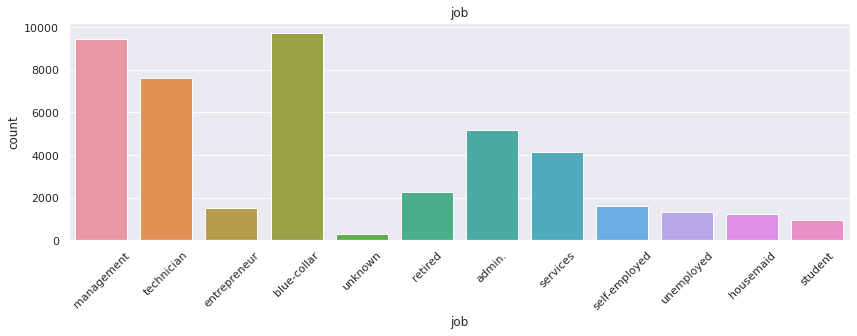

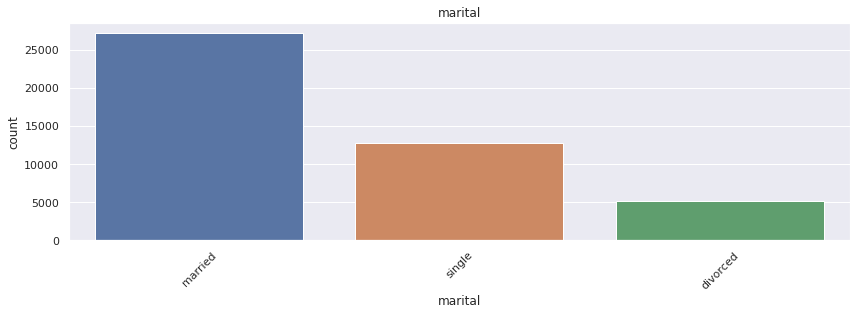

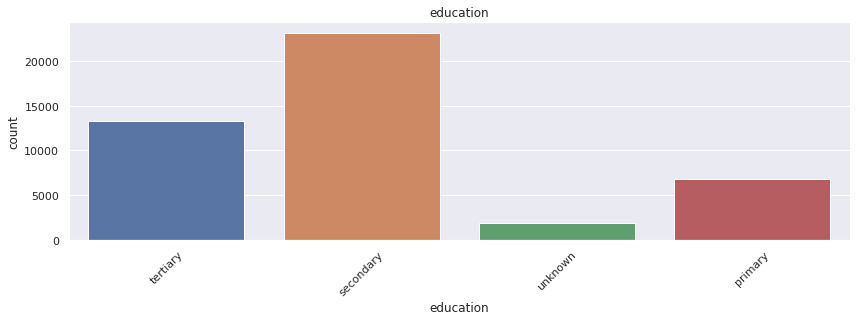

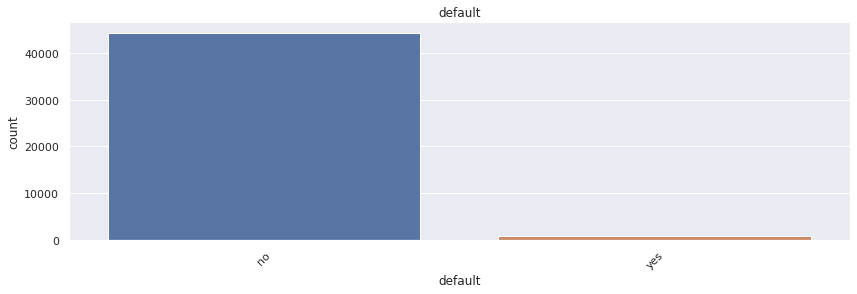

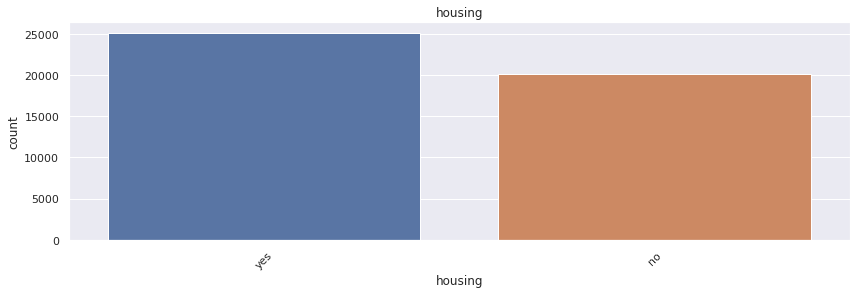

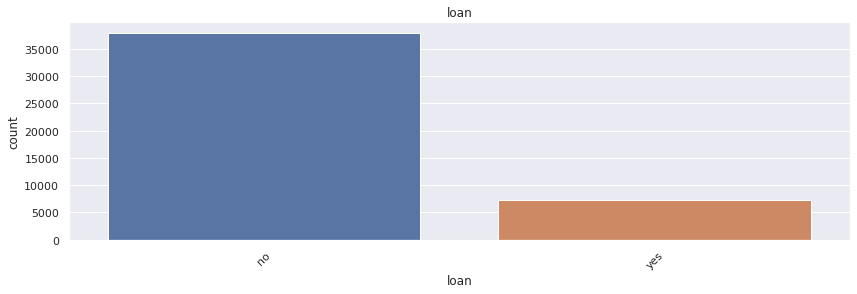

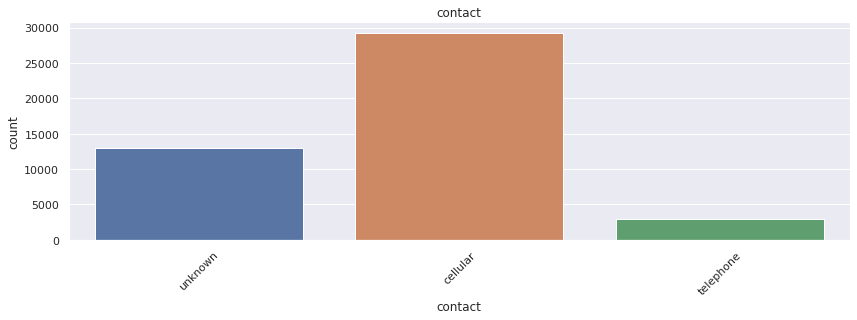

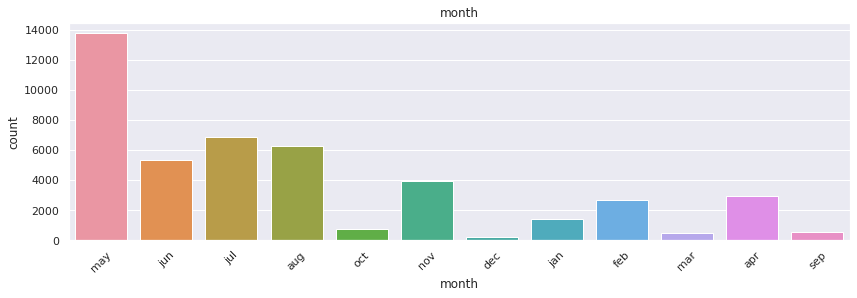

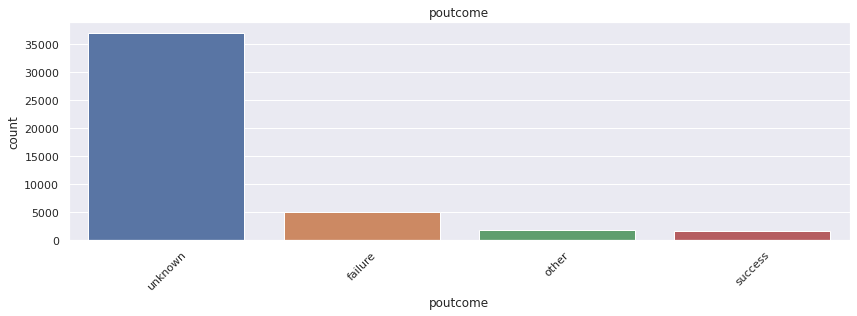

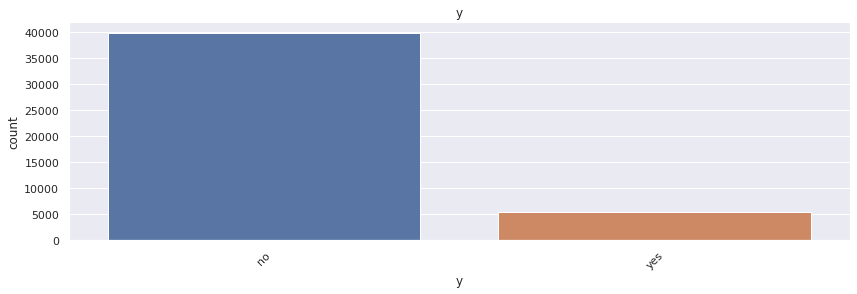

In [176]:
categorical = train.select_dtypes(include=['object']).columns.values

for col in categorical:
    #plt.figure(figsize=(8,4))
    sns.countplot(x=train[col], data=train)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

# 2. Procesamiento de datos

## 2.1. Cambiar el tipo de datos

Se transforman las 4 variables binarias (tiene o no tiene)

In [177]:
def binary_to_num(df, col):
  return np.where(df[col] == 'no', 0, 1)

In [178]:
for col in ['default', 'housing', 'loan', 'y']:
  train[col + '_num'] = binary_to_num(train, col)
  test[col + '_num'] = binary_to_num(test, col)

In [179]:
#Antes del cambio en default en train, vemos las siguientes observaciones
train['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [180]:
#Luego del cambio en default en train, vemos las siguientes observaciones
train['default_num'].value_counts()

0    44396
1      815
Name: default_num, dtype: int64

## 2.2. OPCIONAL: Eliminar Variables

Se eliminarán las columnas `month` y `day` ya que este dataset se formó con información desde Mayo del año 2008 hasta Noviembre del 2010, sin embargo, no se informa que año pertenece cada observación, entonces es posible entrenar con sesgos estadísticos por tener información desbalanceada. 

Como se puede notar, Mayo tiene 3 observaciones (Mayo del 2008, 2009 y 2010) mientras que Abril solo tiene 2 observaciones (Abril 2009 y 2010).

In [181]:
train['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [182]:
train['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

# 3. Selección de Variables (Feature Selection)

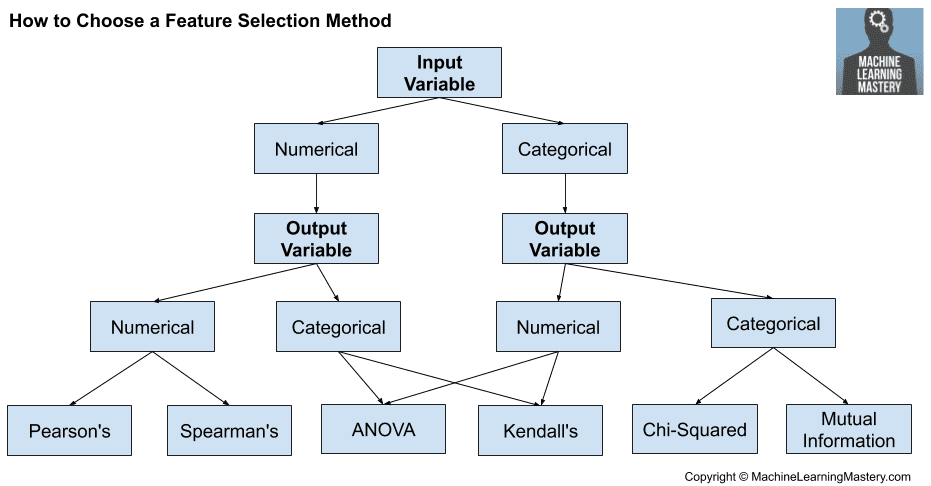

Fuente: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

Para la selección de variables, es necesario trabajar con las columnas categoricas y numéricas de manera diferenciada. Debemos aplicar reglas estadísticas que nos permitan detectar que son variables relevantes para generar modelos predictivos.

Para las variables categoricas, vamos a utilizar la prueba de Chi-Cuadrado, mientras que para las variables numéricas, vamos a realizar la prueba ANOVA.

## 3.1 Separación entre Variables Numéricas y Categóricas

In [183]:
train.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'default_num',
 'housing_num',
 'loan_num',
 'y_num']

In [184]:
cat = train[['job', 'marital', 'education', 'poutcome', 'y_num']]
num = train[['age', 'balance', 'duration', 'campaign', 'pdays', 
             'previous', 'default_num', 'housing_num', 'loan_num', 'y_num']]

In [185]:
print('Categorical Data: ', cat.shape)
print('Numerical Data: ', num.shape)

Categorical Data:  (45211, 5)
Numerical Data:  (45211, 10)


## 3.2. Variables Numéricas como Input y Output Categórica (contrata o no contrata)

**Prueba: Chi-squared**

In [186]:
cat.head()

,job,marital,education,poutcome,y_num
0,management,married,tertiary,unknown,0
1,technician,single,secondary,unknown,0
2,entrepreneur,married,secondary,unknown,0
3,blue-collar,married,unknown,unknown,0
4,unknown,single,unknown,unknown,0


In [187]:
category = cat.columns[:-1]
x_cat = cat[category]
y_cat = cat['y_num']

x_cat.head()

,job,marital,education,poutcome
0,management,married,tertiary,unknown
1,technician,single,secondary,unknown
2,entrepreneur,married,secondary,unknown
3,blue-collar,married,unknown,unknown
4,unknown,single,unknown,unknown


In [188]:
# Transform categorical data into numerical data

le = LabelEncoder()

x_cat['job'] = le.fit_transform(x_cat['job'])
x_cat['marital'] = le.fit_transform(x_cat['marital'])
x_cat['education'] = le.fit_transform(x_cat['education'])
x_cat['poutcome'] = le.fit_transform(x_cat['poutcome'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [189]:
x_cat.head()

,job,marital,education,poutcome
0,4,1,2,3
1,9,2,1,3
2,2,1,1,3
3,1,1,3,3
4,11,2,3,3


In [190]:
x_cat.skew()

job          0.261755
marital     -0.102826
education    0.197275
poutcome    -1.973561
dtype: float64

In [191]:
# Data Normalization
x_catnorm = MinMaxScaler().fit_transform(x_cat)

In [192]:
chi_score, pvalue = chi2(x_catnorm, y_cat)

In [193]:
for i in range(len(category)):
    print(str(category[i]) + ': ', pvalue[i])

job:  4.647901318749266e-05
marital:  0.00011438719484978733
education:  3.885242371053226e-08
poutcome:  3.484216479910501e-09


**Conclusión:**

Todas las variables categóricas son significantes ya que el P-Value < 0.05.

## 3.3. Variables Categóricas como Input y Output Categórica (contrata o no contrata)

**Prueba: ANOVA y prueba de Correlación**

In [194]:
num.head()

,age,balance,duration,campaign,pdays,previous,default_num,housing_num,loan_num,y_num
0,58,2143,261,1,-1,0,0,1,0,0
1,44,29,151,1,-1,0,0,1,0,0
2,33,2,76,1,-1,0,0,1,1,0
3,47,1506,92,1,-1,0,0,1,0,0
4,33,1,198,1,-1,0,0,0,0,0


### 3.3.1. Correlation Test

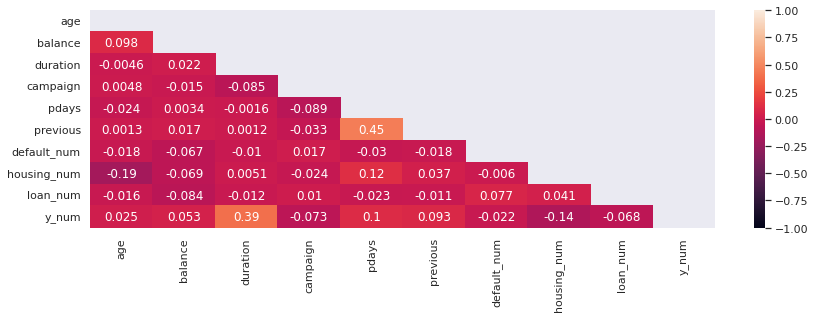

In [195]:
mask = np.triu(np.ones_like(num.corr(), dtype=bool))
sns.heatmap(num.corr(), vmin=-1, vmax=1, mask=mask, annot=True)
plt.show()

### 3.3.2. ANOVA

In [196]:
num.skew()

age             0.684818
balance         8.360308
duration        3.144318
campaign        4.898650
pdays           2.615715
previous       41.846454
default_num     7.245375
housing_num    -0.224766
loan_num        1.852617
y_num           2.383480
dtype: float64

In [197]:
numeric = num.columns[:-1]
x_num = num[numeric]
y_num = num['y_num']

In [198]:
x_num.head()

,age,balance,duration,campaign,pdays,previous,default_num,housing_num,loan_num
0,58,2143,261,1,-1,0,0,1,0
1,44,29,151,1,-1,0,0,1,0
2,33,2,76,1,-1,0,0,1,1
3,47,1506,92,1,-1,0,0,1,0
4,33,1,198,1,-1,0,0,0,0


In [199]:
# Data Normalization
x_numnorm = MinMaxScaler().fit_transform(x_num)

In [200]:
f_score, p_value = f_classif(x_numnorm, y_num)

In [201]:
for i in range(len(numeric)):
    print(numeric[i], ': ', p_value[i])

age :  8.82564369173634e-08
balance :  2.521113691910737e-29
duration :  0.0
campaign :  1.0123473643070218e-54
pdays :  3.7905533194863624e-108
previous :  7.801830349573926e-88
default_num :  1.866326526158345e-06
housing_num :  2.621926571845309e-194
loan_num :  9.793657535311501e-48


**Conclusión:**

Todas las variables numéricas son significantes ya que el P-Value < 0.05.

# 4. Procesamiento de datos para Modelar

## 4.1. Reorganización de columnas 

**Training Dataset**

In [202]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,default_num,housing_num,loan_num,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,0,0,0,0


In [203]:
train.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'default_num',
       'housing_num', 'loan_num', 'y_num'], dtype=object)

In [204]:
# Reorganizamos las columnas para mayor facilidad
columns_reorg = ['marital',  'poutcome', 'job', 'education', 'age', 'balance',
                    'duration', 'campaign', 'pdays', 'previous', 'default_num',
                    'housing_num', 'loan_num', 'y_num']

train_data = train[columns_reorg]

test_data = test[columns_reorg]

train_data.head()

,marital,poutcome,job,education,age,balance,duration,campaign,pdays,previous,default_num,housing_num,loan_num,y_num
0,married,unknown,management,tertiary,58,2143,261,1,-1,0,0,1,0,0
1,single,unknown,technician,secondary,44,29,151,1,-1,0,0,1,0,0
2,married,unknown,entrepreneur,secondary,33,2,76,1,-1,0,0,1,1,0
3,married,unknown,blue-collar,unknown,47,1506,92,1,-1,0,0,1,0,0
4,single,unknown,unknown,unknown,33,1,198,1,-1,0,0,0,0,0


## 4.2. Encoding de Variables Categóricas

Necesitamos transformar a las variables categóricas, hay múltiples formas de realizar esta tarea, para mayor información revisar la web de scikit-learn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Vamos a realizar las siguientes metologías:
* `job`: Vamos a utilizar **Label Encoding** (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) ya que cuenta con muchas categorías.
* `education`: Vamos a utilizar **Label Encoding** ya que conlleva un orden relevante.
* `marital`: Vamos a utilizar **One Hot Encoding** (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).
* `poutcome`: Vamos a utilizar **One Hot Encoding**.

In [205]:
le = LabelEncoder()

# Variable 'Job'
train_data['job'] = le.fit_transform(train_data['job'])
test_data['job'] = le.transform(test_data['job'])

# Variable 'Education'
train_data['education'] = le.fit_transform(train_data['education'])
test_data['education'] = le.transform(test_data['education'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [206]:
train_data.head()

,marital,poutcome,job,education,age,balance,duration,campaign,pdays,previous,default_num,housing_num,loan_num,y_num
0,married,unknown,4,2,58,2143,261,1,-1,0,0,1,0,0
1,single,unknown,9,1,44,29,151,1,-1,0,0,1,0,0
2,married,unknown,2,1,33,2,76,1,-1,0,0,1,1,0
3,married,unknown,1,3,47,1506,92,1,-1,0,0,1,0,0
4,single,unknown,11,3,33,1,198,1,-1,0,0,0,0,0


In [225]:
# Separo variables
features = train_data.columns[0:-1]
features_onehot = train_data.columns[0:2]
features_num = train_data.columns[2:-1]

# Separo a train y test por cada tipo de variable
X_train = train_data[features]
X_test = test_data[features]
X_onehot_train = train_data[features_onehot]
X_onehot_test = test_data[features_onehot]
X_num_train = train_data[features_num]
X_num_test = test_data[features_num]

In [226]:
X_train.head(3)

,marital,poutcome,job,education,age,balance,duration,campaign,pdays,previous,default_num,housing_num,loan_num
0,married,unknown,4,2,58,2143,261,1,-1,0,0,1,0
1,single,unknown,9,1,44,29,151,1,-1,0,0,1,0
2,married,unknown,2,1,33,2,76,1,-1,0,0,1,1


In [227]:
X_onehot_train.head(3)

,marital,poutcome
0,married,unknown
1,single,unknown
2,married,unknown


In [228]:
X_num_train.head(3)

,job,education,age,balance,duration,campaign,pdays,previous,default_num,housing_num,loan_num
0,4,2,58,2143,261,1,-1,0,0,1,0
1,9,1,44,29,151,1,-1,0,0,1,0
2,2,1,33,2,76,1,-1,0,0,1,1


#### Separo la Target (Variable Objetivo)

In [229]:
y_train = train_data['y_num']
y_test = test_data['y_num']
y_train.value_counts()

0    39922
1     5289
Name: y_num, dtype: int64

## 4.3. One Hot Encoder

Aplica una metodología que genera una columna por cada categoría de cada variable, donde vemos un 0 si no se observa esa categoria en esa fila y un 1 en caso contrario.

In [231]:
# One Hot Encoding
ohe = OneHotEncoder()

for col in X_onehot_train.columns.tolist():
  X_onehot_train_transformed = ohe.fit_transform(X_onehot_train)
  X_onehot_test_transformed = ohe.transform(X_onehot_test)

In [232]:
X_onehot_train = pd.DataFrame([])
X_onehot_test = pd.DataFrame([])
observation_list = []

for category in range(0,len(ohe.categories_)):
  for value in list(ohe.categories_[category]):
    observation_list.append(value)

In [233]:
X_onehot_train[observation_list] = X_onehot_train_transformed.toarray()
X_onehot_test[observation_list] = X_onehot_test_transformed.toarray()
X_onehot_train.head()

,divorced,married,single,failure,other,success,unknown
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 4.4. Estandarizar Datos Numericos

Para algunos algoritmos es necesario re-escalar las variables numericas para una predicción mejor

In [234]:
scaler = StandardScaler()
X_num_train = pd.DataFrame(scaler.fit_transform(X_num_train))
X_num_test = pd.DataFrame(scaler.transform(X_num_test))
X_num_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.103820,1.036362,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
1,1.424008,-0.300556,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
2,-0.714951,-0.300556,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,2.289359


In [235]:
X_num_train.columns = features_num
X_num_test.columns = features_num
X_num_train.head(3)

,job,education,age,balance,duration,campaign,pdays,previous,default_num,housing_num,loan_num
0,-0.103820,1.036362,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
1,1.424008,-0.300556,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
2,-0.714951,-0.300556,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,2.289359


In [236]:
X_train = pd.concat([X_onehot_train, X_num_train], axis=1)
X_test = pd.concat([X_onehot_test, X_num_test], axis=1)

X_train.head()

,divorced,married,single,failure,other,success,unknown,job,education,age,balance,duration,campaign,pdays,previous,default_num,housing_num,loan_num
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.103820,1.036362,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.424008,-0.300556,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.714951,-0.300556,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,2.289359
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.020516,2.373280,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.035139,2.373280,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.25194,-0.13549,-1.118674,-0.436803


In [237]:
X_train.shape

(45211, 18)

In [238]:
y_train.shape

(45211,)

In [239]:
X_test.shape

(4521, 18)

In [240]:
y_test.shape

(4521,)

# 5. Selección del Modelo Óptimo 

## 5.1. Listar los Modelos

In [242]:
models = []
models.append(LogisticRegression(solver='liblinear'))
models.append(SVC())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(GaussianNB())

## 5.2. Entrenar los Modelos

In [244]:
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 
              'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

## 5.3. Evaluación de los Modelos

In [245]:
# Accuracy and AUC
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.899580,0.64
1,SVM,0.904446,0.64
2,KNN,0.913957,0.70
3,Decision Tree,1.000000,1.00
4,Random Forest,1.000000,1.00
5,Naive Bayes,0.849370,0.67


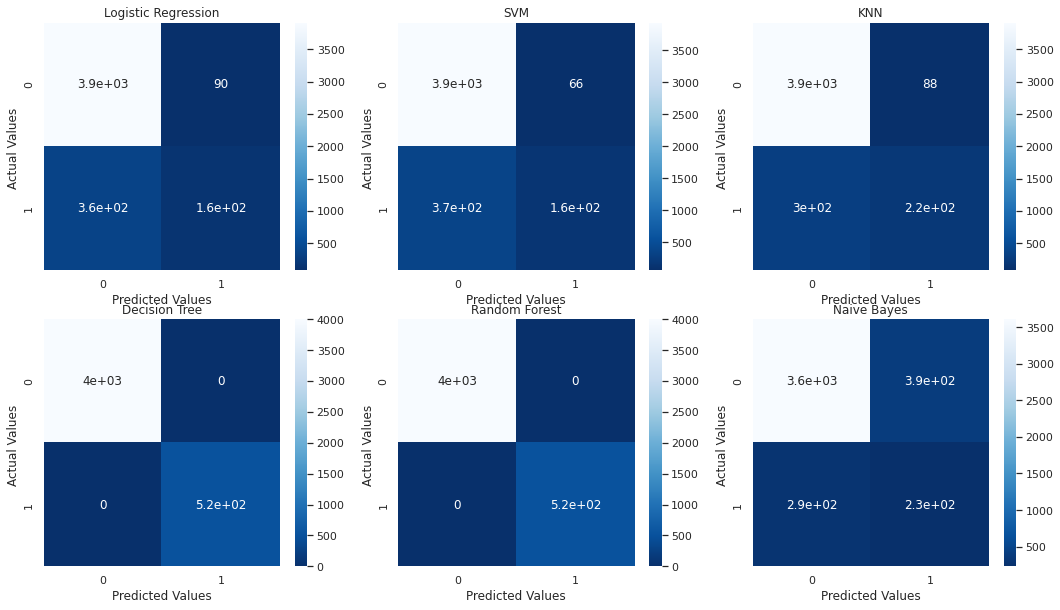

In [246]:
# Plot confusion matrix
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values ')

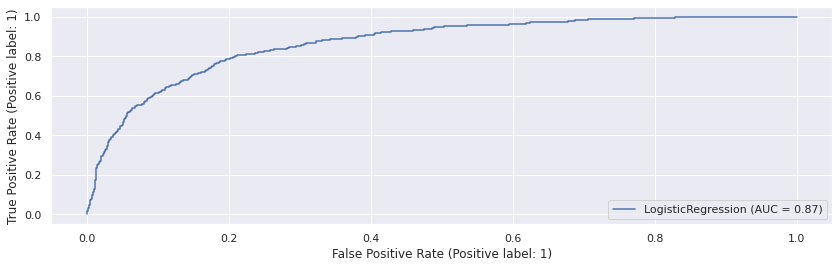

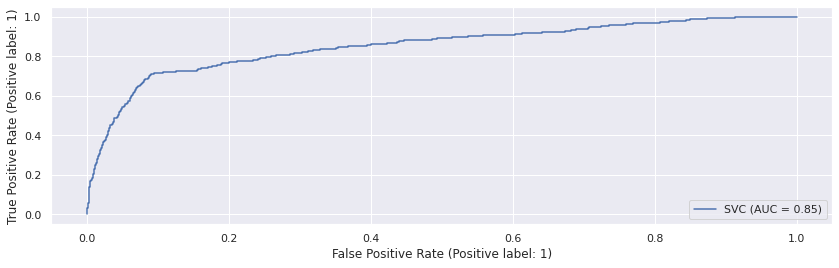

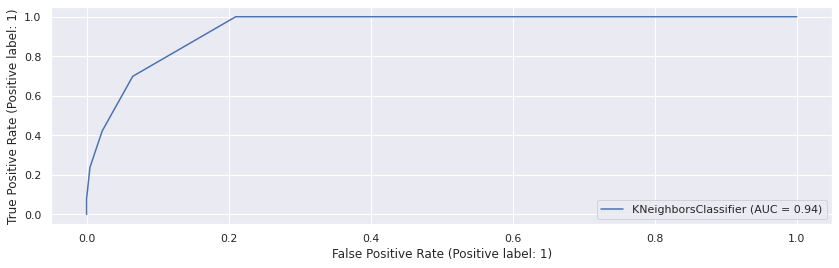

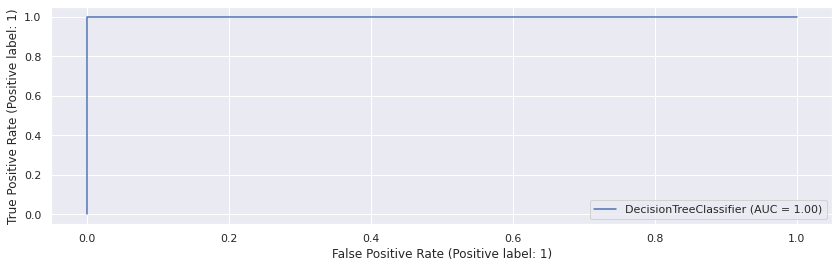

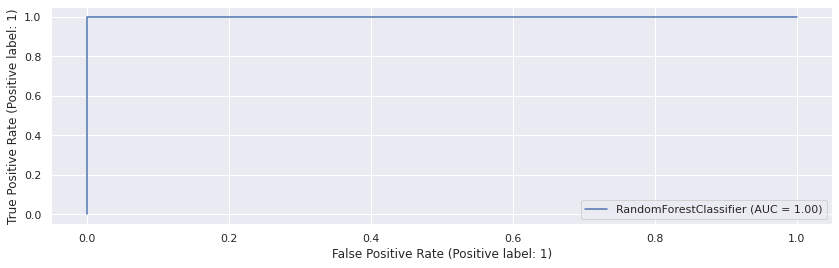

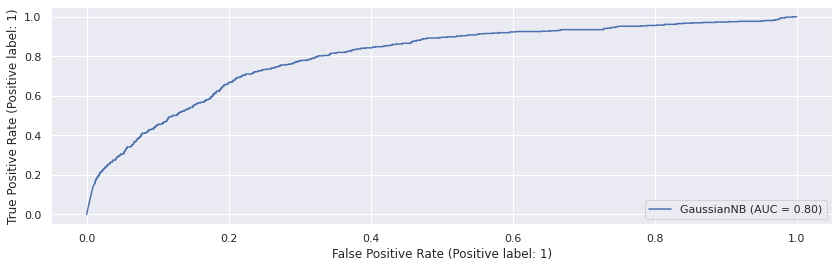

In [247]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

for model in models:
    RocCurveDisplay.from_estimator(model, X_test, y_test)

**Conclusión:**

El mejor modelo es el Random Forest Classifiers con un AUC de 1.